In [7]:
# August 8 2017
# This file is for experiments with student2 5 skills and training trajectory length 6,7,8
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def ixs2ranks(ixs):
    ranks = np.zeros(ixs.shape,dtype=np.int)
    for r,i in enumerate(ixs):
        ranks[i] = r
    return ranks

def graph_trainauc_score(vloss, scores, postfix=None):
    figure()
    if postfix is not None:
        xs = np.sum(vloss[:,-postfix:],axis=1)
    else:
        xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Training Trajectory 6

vloss shape (50, 51)
scores shape (50,)
[ 0.875  0.     0.625  0.     0.125  0.     0.     0.     0.     0.125  1.
  0.     1.     0.875  1.     1.     0.75   0.75   0.5    0.     0.625  0.
  0.     0.     0.25   0.     0.     1.     0.     1.     0.125  0.     0.
  0.     0.     1.     0.     0.875  1.     0.125  0.     0.     1.     0.
  1.     1.     0.     0.     1.     0.875]
 0 | score 0.9 14th | vloss auc 0.00110 17th | selfqval 0.0370 37th
 1 | score 0.0 28th | vloss auc 0.00160 28th | selfqval 0.0007 40th
 2 | score 0.6 18th | vloss auc 0.00148 24th | selfqval 0.6818 19th
 3 | score 0.0 30th | vloss auc 0.00050  1th | selfqval 0.4574 25th
 4 | score 0.1 23th | vloss auc 0.00182 35th | selfqval 0.3188 29th
 5 | score 0.0 31th | vloss auc 0.00064  5th | selfqval 0.8618  7th
 6 | score 0.0 32th | vloss auc 0.00265 47th | selfqval 0.0070 38th
 7 | score 0.0 33th | vloss auc 0.00174 31th | selfqval 0.8534  9th
 8 | score 0.0 34th | vloss auc 0.00176 32th | selfqval 0.0003 41th
 9 |

(-0.1, 1.1)

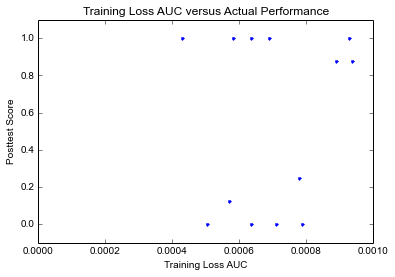

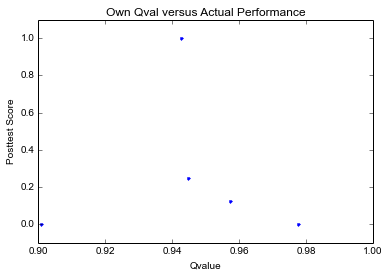

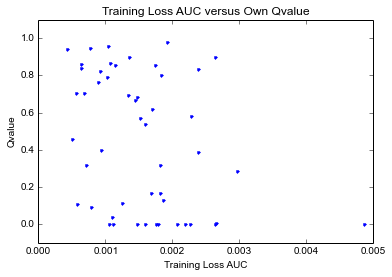

In [20]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr01A.npz')
data12 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr01B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data22 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')
data32 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01B.npz')


vloss = np.vstack((data11['vloss'],data12['vloss']))
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],data22['scores']))[:,0]
realqvals = np.vstack((data21['qvals'],data22['qvals']))[:,0]
selfqvals = np.vstack((data31['qvals'],data32['qvals']))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]
for i in six.moves.range(num_models):
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        i,scores[i], ranked_by_score[i], vloss_auc[i], ranked_by_vloss[i], selfqvals[i], ranked_by_qval[i]))

graph_trainauc_score(vloss, scores, postfix=None)
xlim(0,0.001)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
xlim(0.9,1.0)
ylim(-0.1,1.1)
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)

# Training Trajectories Length 7

vloss shape (50, 41)
scores shape (50,)
[ 0.75   1.     1.     1.     1.     1.     1.     1.     1.     0.     1.
  1.     1.     0.75   1.     1.     1.     1.     1.     0.375  0.     1.
  0.125  1.     0.375  1.     0.     1.     1.     1.     1.     0.     0.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  0.     1.     1.     1.     1.     1.   ]
 0 | score 0.8 39th | vloss auc 0.00083 14th | selfqval 0.9953 12th
 1 | score 1.0 25th | vloss auc 0.00116 22th | selfqval 0.9925 20th
 2 | score 1.0 37th | vloss auc 0.00147 34th | selfqval 0.9876 25th
 3 | score 1.0 30th | vloss auc 0.00139 32th | selfqval 0.8657 43th
 4 | score 1.0  3th | vloss auc 0.00137 31th | selfqval 0.9866 28th
 5 | score 1.0  7th | vloss auc 0.00065  5th | selfqval 0.9954 11th
 6 | score 1.0  1th | vloss auc 0.00116 21th | selfqval 0.9942 17th
 7 | score 1.0  9th | vloss auc 0.00088 15th | selfqval 0.9975  4th
 8 | score 1.0 16th | vloss auc 0.00127 25th | selfqval 0.9718 38th
 9 |

(-0.1, 1.1)

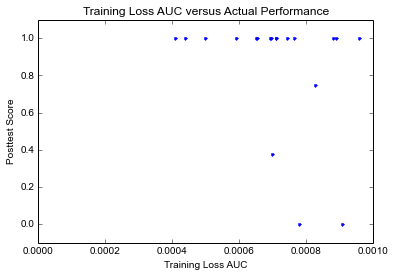

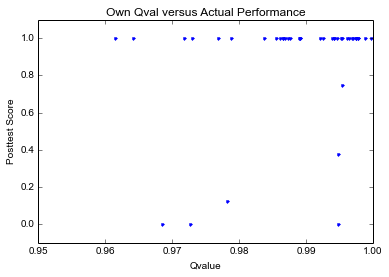

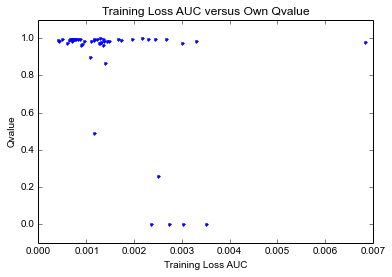

In [18]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01A.npz')
data12 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data22 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')
data32 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01B.npz')


vloss = np.vstack((data11['vloss'],data12['vloss']))
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],data22['scores']))[:,0]
realqvals = np.vstack((data21['qvals'],data22['qvals']))[:,0]
selfqvals = np.vstack((data31['qvals'],data32['qvals']))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]
for i in six.moves.range(num_models):
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        i,scores[i], ranked_by_score[i], vloss_auc[i], ranked_by_vloss[i], selfqvals[i], ranked_by_qval[i]))

graph_trainauc_score(vloss, scores, postfix=None)
xlim(0,0.001)
ylim(-0.1,1.1)
# 0-7 lowest AUC are all good
graph_qval_score(selfqvals, scores)
xlim(0.95,1.0)
ylim(-0.1,1.1)
# 0-11 top qval are all good
# (2,8) (5,11) (6,3) of (qval rank, auc rank) are good
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)
# 39/50 are good

vloss shape (20, 41)
scores shape (20,)
[ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.     0.375
  0.     1.     0.     0.     0.     0.     1.     0.     0.   ]


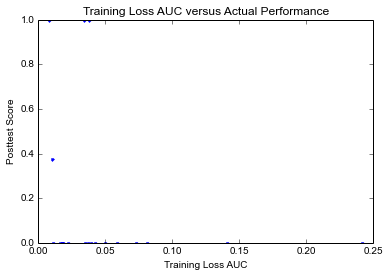

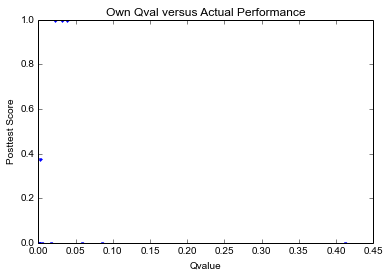

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Dropout 0.8
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout8-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout8-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)

vloss shape (20, 16)
scores shape (20,)
[ 1.   1.   1.   1.   0.   1.   1.   0.5  1.   1.   0.   1.   1.   1.   1.
  1.   1.   1.   1.   1. ]


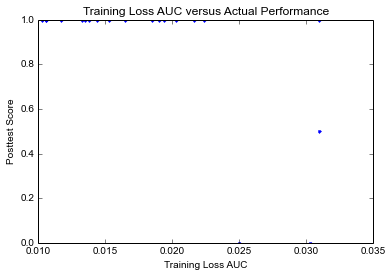

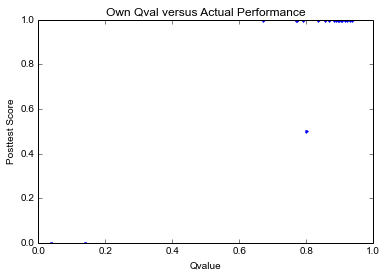

In [7]:
'''
OUTDATED
Analyzing results of student2 with 5 skills, with training length 8 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l8-random.pickle/mcts-rtype2-rollouts30000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)